In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from contrastive.utils.models_database import generate_bdd_models
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtrans

## Automated but complicated ...
models_path = "/neurospin/dico/jlaval/Runs/01_deep_supervised/Program/Output/comparison_HCP_full/"
list_dir = os.listdir(models_path)
paths = [models_path + elem for elem in list_dir]

bdd_models = []

generate_bdd_models(paths, bdd_models=bdd_models, visited=[], dataset='cingulate_ACCpatterns_1')

In [8]:
##handmade AUC plots

#copy AUC values of the different models

ACC_adult_size = [0.726, 0.640, 0.681, 0.710, 0.750, 0.686, 0.699, 0.697]
ACC_baby_size = [0.631, 0.675, 0.499, 0.558, 0.677, 0.619, 0.492, 0.550]
Preterm_baby_size = [0.525, 0.587, 0.698, 0.619, 0.660, 0.591, 0.653, 0.671]
ACC_resize = [0.756, 0.707, 0.730, 0.754, 0.732, 0.715, 0.715, 0.719]
Preterm_resize = [0.533, 0.641, 0.512, 0.517, 0.501, 0.453, 0.479, 0.588]
#ACC_baby_crop = [0.633, 0.566, 0.546, 0.602, 0.558] #the crops were wrong
#Preterm_baby_crop = [0.815, 0.542, 0.509, 0.659, 0.488] #the crops were wrong
ACC_new_crop = [0.714, 0.681, 0.674, 0.754, 0.735, 0.716, 0.648, 0.680, 0.718]
Preterm_new_crop = [0.613, 0.651, 0.647, 0.583, 0.624, 0.687, 0.637, 0.599, 0.689]
Preterm_new_crop_shuffle = [0.479, 0.455, 0.577, 0.521, 0.506, 0.492, 0.492, 0.470, 0.520] #randomly shuffled labels

dict_plot_adult = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": ACC_adult_size,
                   "Baby input size \nInput Size: 21x48x49 \nCrop Size: 17x40x38": ACC_baby_size,
                   "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": ACC_new_crop,
                   "Resize": ACC_resize}

dict_plot_40wks = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": [np.nan],
                   "Baby input size \nInput Size: 21x48x49 \nCrop Size: 21x48x49": Preterm_baby_size,
                   "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": Preterm_new_crop,
                   "Resize": Preterm_resize}

#shuffle preterm labels to show intrinsic variability
dict_plot_shuffle_labels = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": [np.nan],
                            "Baby input size \nInput Size: 21x48x49 \nCrop Size: 21x48x49": [np.nan],
                            "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": Preterm_new_crop_shuffle,
                            "Resize": [np.nan]}



In [9]:
#reformat dictionnaries into dataframes for seaborn

def reformat(dict_plot):

        df = pd.DataFrame({'Model': [], 'AUC': []})
        for model, list_values in dict_plot.items():
            for value in list_values:
                new_row = {'Model': model, 'AUC': value}
                df = df.append(new_row, ignore_index=True)
        
        return df

In [10]:
#plot all models (require to merge the group the dataframes in a dictionnary)

def plot_models_perf(dict_to_plot, save_dir, save_fig=True):

    #erase previous plot
    plt.close()

    #legend
    patches=[]
    for name, (_, color) in dict_to_plot.items():
        patch = mpatches.Patch(color=color, label=name)
        patches.append(patch)
    title='Comparison of AUCs of models with different input size'

    #plot
    fig,ax = plt.subplots(figsize=(8,6))

    for idx, (name, (df, color)) in enumerate(dict_to_plot.items()):
        #tr = offset_plot(idx*3, fig=fig)
        sns.pointplot(data=df, x='Model', y='AUC', color=color, markers='s', linestyles='', ax=ax).set(title=title)
        sns.stripplot(data=df, x='Model', y='AUC', color=color, marker='v', ax=ax)

    #offset the distributions for a same model
    nb_test_sets = len(dict_to_plot.keys())
    for idx in range(nb_test_sets):
        offset = mtrans.ScaledTranslation(0.15*idx, 0, ax.figure.dpi_scale_trans)
        nb_coll = len(ax.collections)
        start_offset_idx, end_offset_idx = idx*nb_coll // nb_test_sets, (idx+1)*nb_coll // nb_test_sets
        for k in range(start_offset_idx, end_offset_idx): #don't really understand the collection organization
            #first offset the points
            trans = ax.collections[k].get_transform()
            ax.collections[k].set_transform(trans + offset)
            #offset the errorbars
            trans = ax.lines[k].get_transform()
            ax.lines[k].set_transform(trans + offset)

    plt.legend(handles=patches)
    plt.xticks(rotation=5)
    if save_fig:
        plt.savefig(save_dir, facecolor='white')

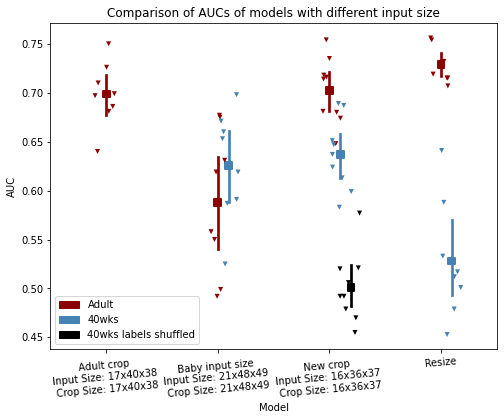

In [11]:
## plot all perf

#reformat the dictionnaries
df_adult = reformat(dict_plot_adult)
df_40wks = reformat(dict_plot_40wks)
df_shuffle_labels = reformat(dict_plot_shuffle_labels)

#group the dataframes in a dictionnary, input for plotting function
dict_to_plot = {"Adult": [df_adult, 'darkred'],
                "40wks": [df_40wks, 'steelblue'],
                "40wks labels shuffled": [df_shuffle_labels, 'black']}

#plot and save model
save_dir = '/home/jl274628/Images/Comparison_AUCs_all.png'
plot_models_perf(dict_to_plot, save_dir, save_fig=True)

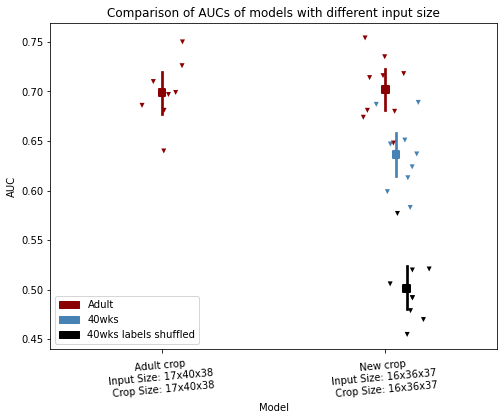

In [12]:
#select only Adult crop and New crop models
dict_plot_adult = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": ACC_adult_size,
                   "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": ACC_new_crop}

dict_plot_40wks = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": [np.nan],
                   "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": Preterm_new_crop}

#shuffle preterm labels to show intrinsic variability
dict_plot_shuffle_labels = {"Adult crop \nInput Size: 17x40x38 \nCrop Size: 17x40x38": [np.nan],
                            "New crop \nInput Size: 16x36x37 \nCrop Size: 16x36x37": Preterm_new_crop_shuffle}

df_adult = reformat(dict_plot_adult)
df_40wks = reformat(dict_plot_40wks)
df_shuffle_labels = reformat(dict_plot_shuffle_labels)

#group the dataframes in a dictionnary, input for plotting function
dict_to_plot = {"Adult": [df_adult, 'darkred'],
                "40wks": [df_40wks, 'steelblue'],
                "40wks labels shuffled": [df_shuffle_labels, 'black']}

#plot and save model
save_dir = '/home/jl274628/Images/Comparison_AUCs_new_crop.png'
plot_models_perf(dict_to_plot, save_dir, save_fig=True)